Here we have build models for following non-linear relationships.
1.

we have to build;
1.polynomial reg

2.Decision Tree Regression

3.NN

4.KNN

and choose best one.


# Data Exploration:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')


In [4]:
#drop unwanted columns
unwanted_columns =["Category Id","Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
data.drop(unwanted_columns, axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  object 
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer State                 180519 non-null  object 
 11  Market                         180519 non-null  object 
 12  Order City                    

# Preprocessing:-

In [6]:
# change object data into int or float

hist_data = data.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
new_data = Change_obj_type(hist_data)
new_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
0,2,5,4,-44.630001,284.250000,1,1,0,66,1,...,1,293.040008,284.250000,-44.630001,7,174,6,79,293.040008,3
1,2,2,4,87.180000,249.080002,0,0,0,66,1,...,1,293.040008,249.080002,87.180000,13,283,6,79,293.040008,3
2,1,3,2,105.489998,293.040008,1,1,0,66,1,...,1,293.040008,293.040008,105.489998,7,440,2,79,293.040008,2
3,1,2,2,25.270000,287.179993,3,0,0,66,1,...,1,293.040008,287.179993,25.270000,7,1002,2,79,293.040008,2
4,1,4,2,21.400000,243.220001,1,1,0,66,1,...,1,293.040008,243.220001,21.400000,15,114,2,79,293.040008,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,1,2,1,79.480003,218.949997,1,1,48,66,1,...,1,260.649994,218.949997,79.480003,15,478,3,107,260.649994,0
180515,1,2,1,16.030001,213.729996,1,1,48,66,1,...,1,260.649994,213.729996,16.030001,7,354,3,107,260.649994,0
180516,2,5,2,-28.860001,255.440002,1,1,48,66,1,...,1,260.649994,255.440002,-28.860001,15,932,4,107,260.649994,2
180517,2,5,2,-31.650000,229.369995,1,1,48,66,1,...,1,260.649994,229.369995,-31.650000,11,90,6,107,260.649994,2


In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  int64  
 8   Customer City                  180519 non-null  int64  
 9   Customer Country               180519 non-null  int64  
 10  Customer State                 180519 non-null  int64  
 11  Market                         180519 non-null  int64  
 12  Order City                    

Detected Outliers:
        Type  Days for shipping (real)  Days for shipment (scheduled)  \
20         2                         2                              1   
22         2                         2                              1   
25         1                         4                              4   
40         1                         3                              4   
46         0                         4                              4   
...      ...                       ...                            ...   
180469     2                         3                              2   
180471     2                         6                              4   
180487     3                         6                              2   
180497     3                         5                              4   
180513     1                         2                              1   

        Benefit per order  Sales per customer  Delivery Status  \
20            -430.769989          246

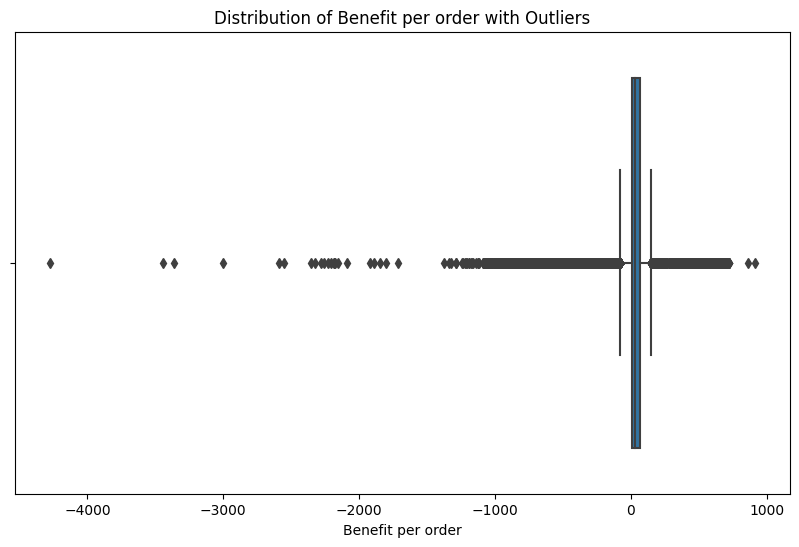

In [8]:
#check for outliers Benefit per order

# Assuming your dataset has a column 'X' with numerical values
data_column = 'Benefit per order'

# Calculate the IQR (Interquartile Range)
Q1 = new_data[data_column].quantile(0.25)
Q3 = new_data[data_column].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = new_data[(new_data[data_column] < lower_bound) | (new_data[data_column] > upper_bound)]

# Print the detected outliers
print("Detected Outliers:")
print(outliers)

# Visualize the distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_data[data_column])
plt.title(f'Distribution of {data_column} with Outliers')
plt.show()

Detected Outliers:
        Type  Days for shipping (real)  Days for shipment (scheduled)  \
22         2                         2                              1   
23         2                         2                              1   
40         1                         3                              4   
95         1                         2                              1   
96         1                         2                              1   
...      ...                       ...                            ...   
179391     2                         2                              2   
179410     1                         4                              2   
179432     2                         4                              4   
179458     1                         2                              4   
179461     2                         6                              4   

        Benefit per order  Sales per customer  Delivery Status  \
22            -183.080002          219

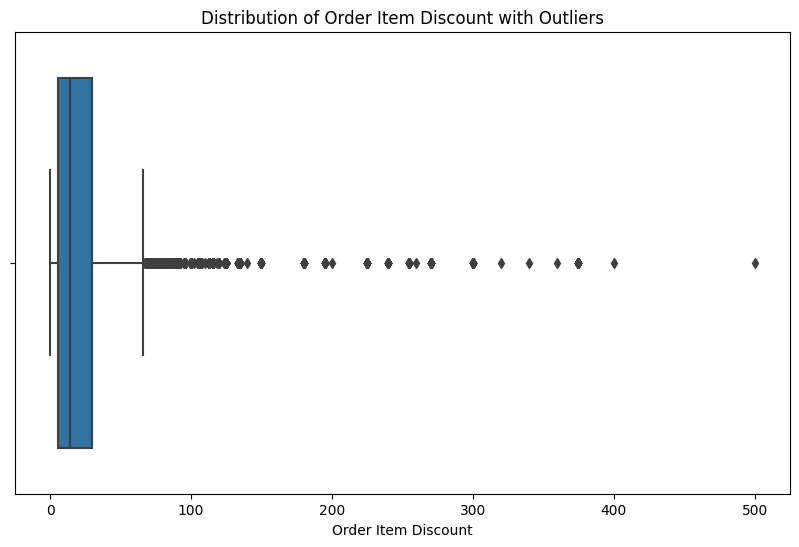

In [9]:
#check for outliers Order Item Discount

# Assuming your dataset has a column 'X' with numerical values
data_column2 = 'Order Item Discount'

# Calculate the IQR (Interquartile Range)
Q12 = new_data[data_column2].quantile(0.25)
Q32 = new_data[data_column2].quantile(0.75)
IQR2 = Q32 - Q12

# Define the upper and lower bounds to identify outliers
lower_bound2 = Q12 - 1.5 * IQR2
upper_bound2 = Q32 + 1.5 * IQR2

# Identify outliers
outliers2 = new_data[(new_data[data_column2] < lower_bound2) | (new_data[data_column2] > upper_bound2)]

# Print the detected outliers
print("Detected Outliers:")
print(outliers2)

# Visualize the distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_data[data_column2])
plt.title(f'Distribution of {data_column2} with Outliers')
plt.show()

**Handle outliers:**

1)Remove outliers-

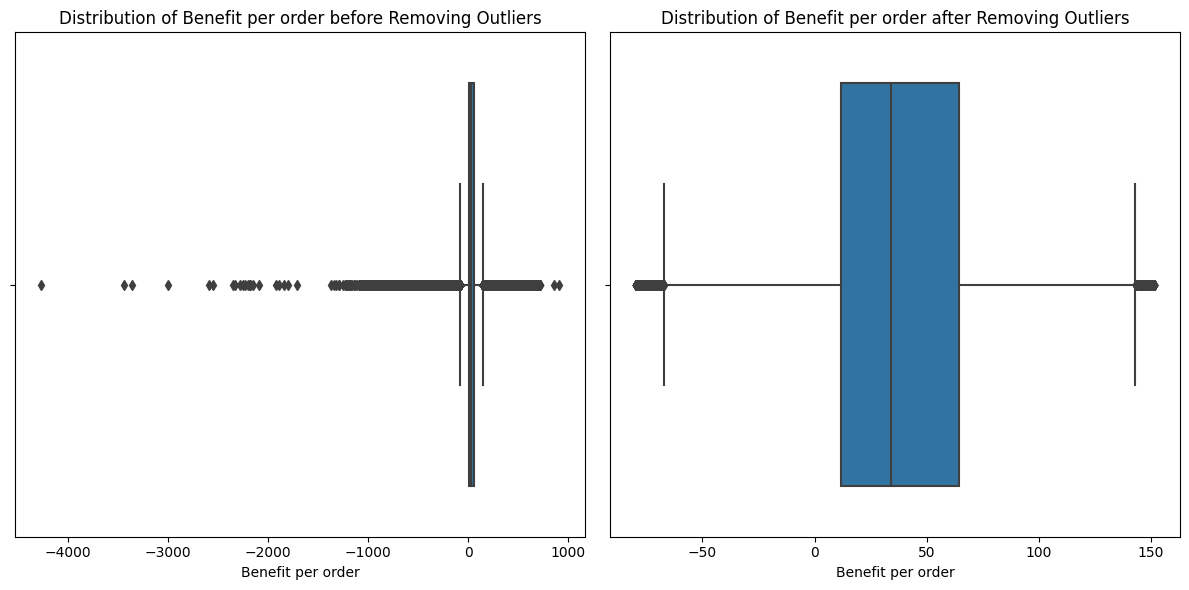

In [9]:
# Remove outliers bpo
df_no_outliers = new_data[(new_data[data_column] >= lower_bound) & (new_data[data_column] <= upper_bound)]

# Visualize the distribution before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_data[data_column])
plt.title(f'Distribution of {data_column} before Removing Outliers')

# Visualize the distribution after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers[data_column])
plt.title(f'Distribution of {data_column} after Removing Outliers')

plt.tight_layout()
plt.show()


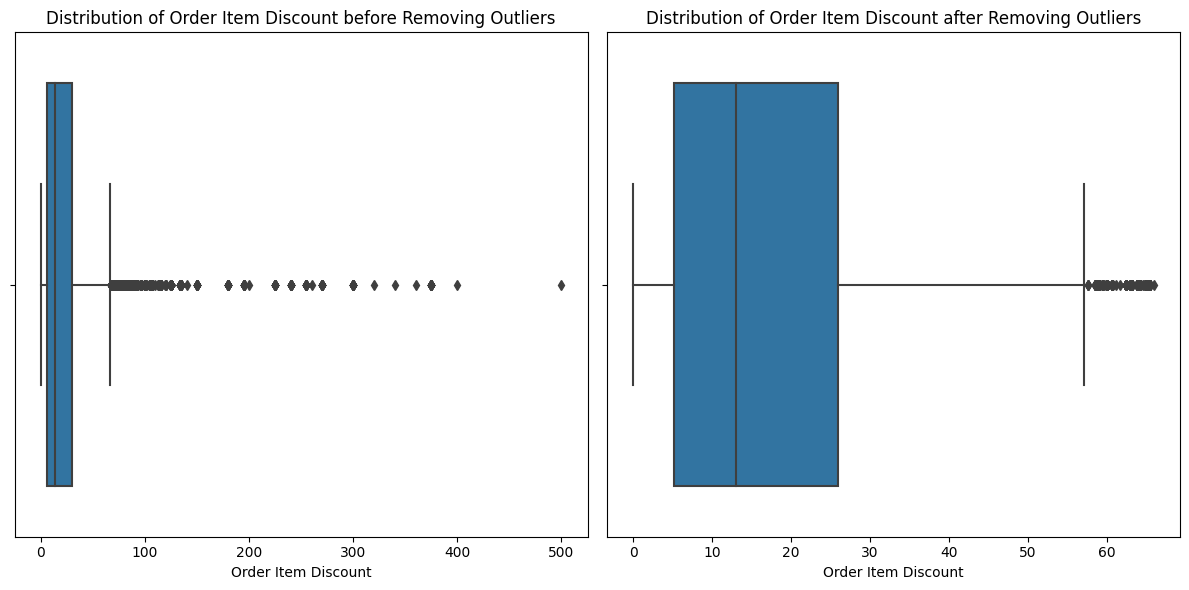

In [10]:
# Remove outliers oid
df_no_outliers2 = new_data[(new_data[data_column2] >= lower_bound2) & (new_data[data_column2] <= upper_bound2)]

# Visualize the distribution before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=new_data[data_column2])
plt.title(f'Distribution of {data_column2} before Removing Outliers')

# Visualize the distribution after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers2[data_column2])
plt.title(f'Distribution of {data_column2} after Removing Outliers')

plt.tight_layout()
plt.show()

**polynomial reg:-**

1.Order item total vs Benefits per order:-

after removing outliers

Mean Squared Error on Test Set: 6530.885003813819
R-squared on Test Set: 0.3652875727947593


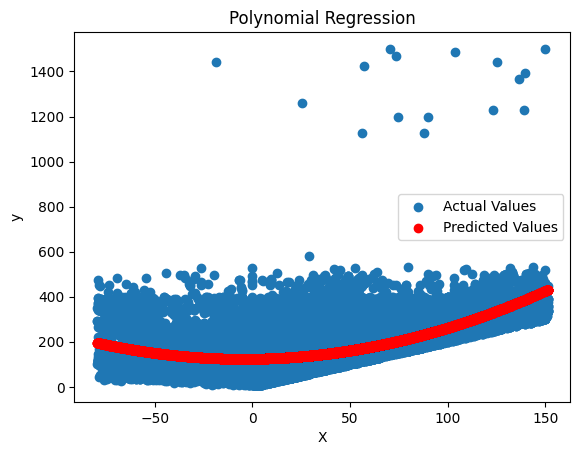

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming your dataset has features and a target column
X5 = df_no_outliers[['Benefit per order']]  # Replace 'feature_column' with the name of your feature column
y5 = df_no_outliers['Order Item Total']  # Replace 'target_column' with the name of your target column

# Split the data into training and test sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Apply Polynomial Regression
degree = 2  # You can adjust the degree as needed
poly_features5 = PolynomialFeatures(degree=degree)
X_train_poly5 = poly_features5.fit_transform(X_train5)
X_test_poly5 = poly_features5.transform(X_test5)

# Train a linear regression model on the polynomial features
model5 = LinearRegression()
model5.fit(X_train_poly5, y_train5)

# Make predictions on the test set
y_pred5 = model5.predict(X_test_poly5)

# Evaluate the model
mse5 = mean_squared_error(y_test5, y_pred5)
r25 = r2_score(y_test5, y_pred5)

print(f'Mean Squared Error on Test Set: {mse5}')
print(f'R-squared on Test Set: {r25}')

# Visualize the results
plt.scatter(X_test5, y_test5, label='Actual Values')
plt.scatter(X_test5, y_pred5, label='Predicted Values', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


before removing outliers

Mean Squared Error on Test Set: 9368.296986524376
R-squared on Test Set: 0.32977703900820343


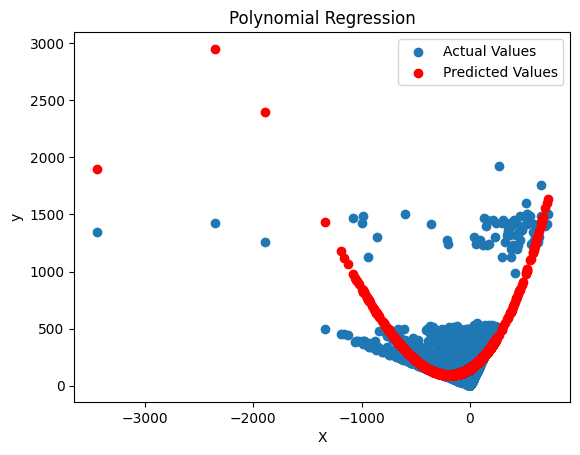

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming your dataset has features and a target column
X1 = new_data[['Benefit per order']]  # Replace 'feature_column' with the name of your feature column
y1 = new_data['Order Item Total']  # Replace 'target_column' with the name of your target column

# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Apply Polynomial Regression
degree = 3  # You can adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly1 = poly_features.fit_transform(X_train1)
X_test_poly1 = poly_features.transform(X_test1)

# Train a linear regression model on the polynomial features
model1 = LinearRegression()
model1.fit(X_train_poly1, y_train1)

# Make predictions on the test set
y_pred1 = model1.predict(X_test_poly1)

# Evaluate the model
mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)

print(f'Mean Squared Error on Test Set: {mse1}')
print(f'R-squared on Test Set: {r21}')

# Visualize the results
plt.scatter(X_test1, y_test1, label='Actual Values')
plt.scatter(X_test1, y_pred1, label='Predicted Values', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

**polynomial reg:-**

2.order item totl vs order item discount:-

before outlier remove

Mean Squared Error on Test Set: 10441.92575954072
R-squared on Test Set: 0.2529679181731088


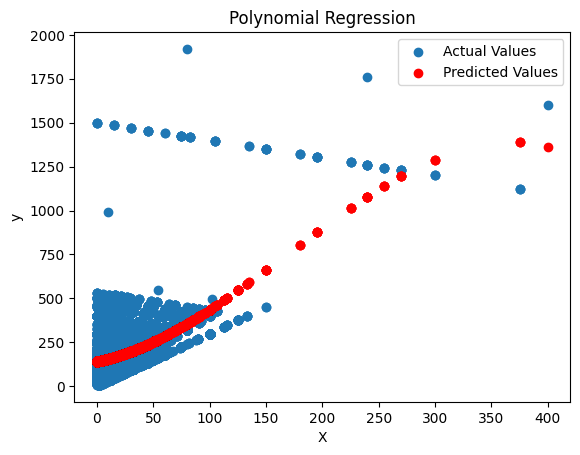

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming your dataset has features and a target column
X4 = new_data[['Order Item Discount']]
y4 = new_data['Order Item Total']

# Split the data into training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Apply Polynomial Regression
poly_features4 = PolynomialFeatures(degree=3)
X_train_poly4= poly_features4.fit_transform(X_train4)
X_test_poly4= poly_features4.transform(X_test4)

# Train a linear regression model on the polynomial features
model4 = LinearRegression()
model4.fit(X_train_poly4, y_train4)

# Make predictions on the test set
y_pred4 = model4.predict(X_test_poly4)

# Evaluate the model
mse4 = mean_squared_error(y_test4, y_pred4)
r24 = r2_score(y_test4, y_pred4)

print(f'Mean Squared Error on Test Set: {mse4}')
print(f'R-squared on Test Set: {r24}')

# Visualize the results
plt.scatter(X_test4, y_test4, label='Actual Values')
plt.scatter(X_test4, y_pred4, label='Predicted Values', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

after outlier remove

Mean Squared Error on Test Set: 9687.356524474937
R-squared on Test Set: 0.13390231218151927


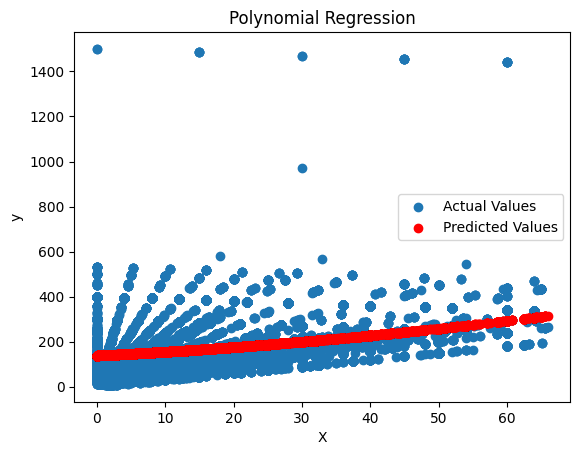

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming your dataset has features and a target column
X6 = df_no_outliers2[['Order Item Discount']]  # Replace 'feature_column' with the name of your feature column
y6 = df_no_outliers2['Order Item Total']  # Replace 'target_column' with the name of your target column

# Split the data into training and test sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Apply Polynomial Regression

poly_features6 = PolynomialFeatures(degree=3)
X_train_poly6 = poly_features6.fit_transform(X_train6)
X_test_poly6 = poly_features6.transform(X_test6)

# Train a linear regression model on the polynomial features
model6 = LinearRegression()
model6.fit(X_train_poly6, y_train6)

# Make predictions on the test set
y_pred6 = model6.predict(X_test_poly6)

# Evaluate the model
mse6 = mean_squared_error(y_test6, y_pred6)
r26 = r2_score(y_test6, y_pred6)

print(f'Mean Squared Error on Test Set: {mse6}')
print(f'R-squared on Test Set: {r26}')

# Visualize the results
plt.scatter(X_test6, y_test6, label='Actual Values')
plt.scatter(X_test6, y_pred6, label='Predicted Values', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


**NN:**

1) order Item tot vs bpo:

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# Assuming your dataset has columns 'Benefit per order' and 'Order Item Total'
X2 = new_data['Benefit per order'].values.reshape(-1, 1)
y2 = new_data['Order Item Total'].values

In [ ]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Scaling data
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

In [ ]:
# Create a neural network model with adjusted hyperparameters
mlp_model = MLPRegressor(
    hidden_layer_sizes=(50, 25),  # Two hidden layers with 50 and 25 neurons
    activation='relu',  # Rectified Linear Unit activation function
    solver='adam',  # Adaptive Moment Estimation (Adam) solver
    alpha=0.0001,  # L2 regularization term
    learning_rate='constant',  # Keep the learning rate constant
    learning_rate_init=0.001,  # Initial learning rate
    max_iter=500,  # Maximum number of iterations
    random_state=42
)


In [ ]:
# Train the model
mlp_model.fit(X_train_scaled2, y_train2)


MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)

Mean Squared Error on Test Set: 6562.092359244463
R-squared on Test Set: 0.5305374095589871


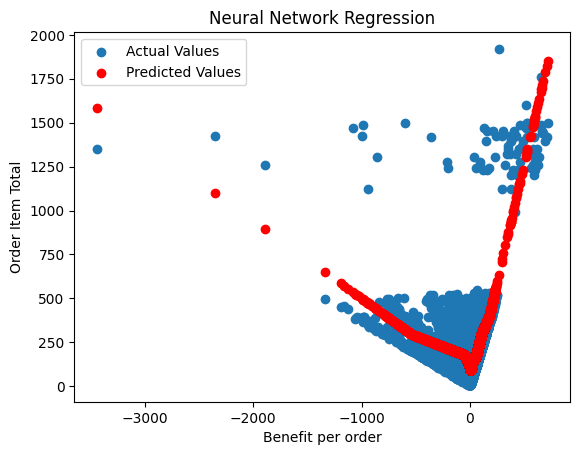

In [ ]:
# Make predictions on the test set
y_pred2 = mlp_model.predict(X_test_scaled2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

print(f'Mean Squared Error on Test Set: {mse2}')
print(f'R-squared on Test Set: {r22}')

# Visualize the results
plt.scatter(X_test2, y_test2, label='Actual Values')
plt.scatter(X_test2, y_pred2, label='Predicted Values', color='red')
plt.xlabel('Benefit per order')
plt.ylabel('Order Item Total')
plt.title('Neural Network Regression')
plt.legend()
plt.show()

better than polynomial reg.

2) order Item tot vs oid:

In [ ]:
# Assuming your dataset has columns 'Benefit per order' and 'Order Item Total'
X3 = new_data['Order Item Discount'].values.reshape(-1, 1)
y3 = new_data['Order Item Total'].values

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [ ]:
# Scaling data
scaler3 = StandardScaler()
X_train_scaled3 = scaler3.fit_transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

# Create a neural network model with adjusted hyperparameters
mlp_model3 = MLPRegressor(
    hidden_layer_sizes=(20, 5),  # Two hidden layers with 50 and 25 neurons
    activation='relu',  # Rectified Linear Unit activation function
    solver='adam',  # Adaptive Moment Estimation (Adam) solver
    alpha=0.0001,  # L2 regularization term
    learning_rate='constant',  # Keep the learning rate constant
    learning_rate_init=0.001,  # Initial learning rate
    max_iter=500,  # Maximum number of iterations
    random_state=42
)

# Train the model
mlp_model3.fit(X_train_scaled3, y_train3)



MLPRegressor(hidden_layer_sizes=(20, 5), max_iter=500, random_state=42)

Mean Squared Error on Test Set: 10361.405748791192
R-squared on Test Set: 0.2587284486197061


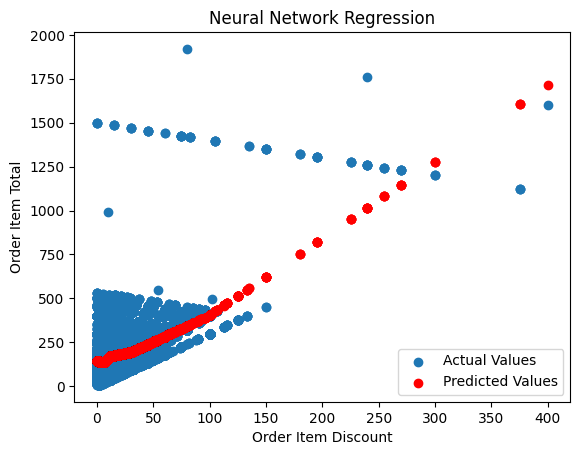

In [ ]:
# Make predictions on the test set
y_pred3 = mlp_model3.predict(X_test_scaled3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
r23 = r2_score(y_test3, y_pred3)

print(f'Mean Squared Error on Test Set: {mse3}')
print(f'R-squared on Test Set: {r23}')

# Visualize the results
plt.scatter(X_test3, y_test3, label='Actual Values')
plt.scatter(X_test3, y_pred3, label='Predicted Values', color='red')
plt.xlabel('Order Item Discount')
plt.ylabel('Order Item Total')
plt.title('Neural Network Regression')
plt.legend()
plt.show()

not suitable

**Decision Tree Regression:**

1)order Item tot vs bpo:

Mean Squared Error on Test Set: 5533.289802990679
R-squared on Test Set: 0.6041395910995783


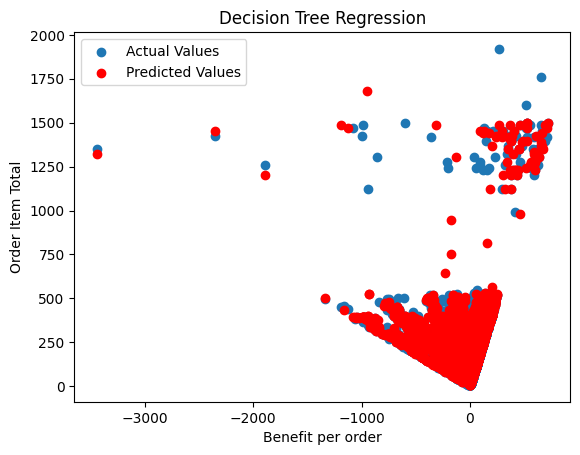

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Assuming your dataset has columns 'X' and 'y'
X7 = new_data['Benefit per order'].values.reshape(-1, 1)
y7 = new_data['Order Item Total'].values

# Split the data into training and testing sets
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
dt_model7 = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model7.fit(X_train7, y_train7)

# Make predictions on the test set
y_pred7 = dt_model7.predict(X_test7)

# Evaluate the model
mse7 = mean_squared_error(y_test7, y_pred7)
r27 = r2_score(y_test7, y_pred7)

print(f'Mean Squared Error on Test Set: {mse7}')
print(f'R-squared on Test Set: {r27}')

# Visualize the results
plt.scatter(X_test7, y_test7, label='Actual Values')
plt.scatter(X_test7, y_pred7, label='Predicted Values', color='red')
plt.xlabel('Benefit per order')
plt.ylabel('Order Item Total')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


2)OIT vs OID:-

Mean Squared Error on Test Set: 6015.6529014201815
R-squared on Test Set: 0.569630562984049


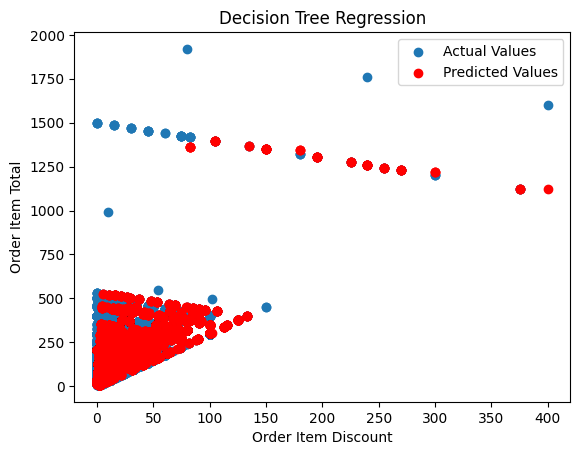

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Assuming your dataset has columns 'X' and 'y'
X8 = new_data['Order Item Discount'].values.reshape(-1, 1)
y8 = new_data['Order Item Total'].values

# Split the data into training and testing sets
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
dt_model8 = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model8.fit(X_train8, y_train8)

# Make predictions on the test set
y_pred8 = dt_model8.predict(X_test8)

# Evaluate the model
mse8 = mean_squared_error(y_test8, y_pred8)
r28 = r2_score(y_test8, y_pred8)

print(f'Mean Squared Error on Test Set: {mse8}')
print(f'R-squared on Test Set: {r28}')

# Visualize the results
plt.scatter(X_test8, y_test8, label='Actual Values')
plt.scatter(X_test8, y_pred8, label='Predicted Values', color='red')
plt.xlabel('Order Item Discount')
plt.ylabel('Order Item Total')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()


**KNN Reg**

1)order Item tot vs bpo:

Mean Squared Error on Test Set: 5345.99985111568
R-squared on Test Set: 0.617538614026609


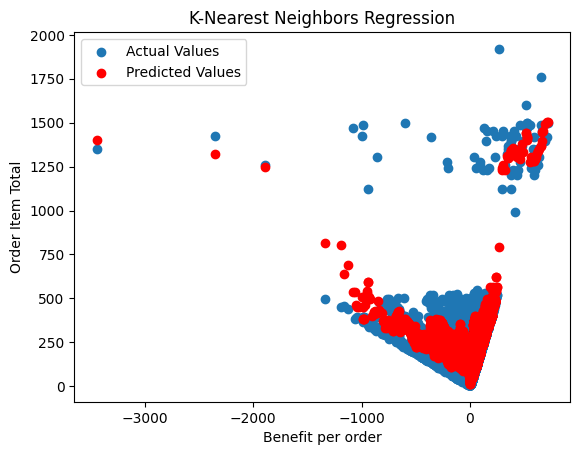

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming your dataset has columns 'X' and 'y'
X9 = new_data['Benefit per order'].values.reshape(-1, 1)
y9 = new_data['Order Item Total'].values

# Split the data into training and testing sets
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.2, random_state=42)

# Create a KNN regression model
knn_model9 = KNeighborsRegressor(n_neighbors=15)  # You can adjust the number of neighbors (k)

# Train the model
knn_model9.fit(X_train9, y_train9)

# Make predictions on the test set
y_pred9 = knn_model9.predict(X_test9)

# Evaluate the model
mse9 = mean_squared_error(y_test9, y_pred9)
r29 = r2_score(y_test9, y_pred9)

print(f'Mean Squared Error on Test Set: {mse9}')
print(f'R-squared on Test Set: {r29}')

# Visualize the results
plt.scatter(X_test9, y_test9, label='Actual Values')
plt.scatter(X_test9, y_pred9, label='Predicted Values', color='red')
plt.xlabel('Benefit per order')
plt.ylabel('Order Item Total')
plt.title('K-Nearest Neighbors Regression')
plt.legend()
plt.show()


neightbours=15 is best value which gives max r^2=0.6175

2)OIT vs OID:-

Mean Squared Error on Test Set: 13639.16044676372
R-squared on Test Set: 0.02423263126465247


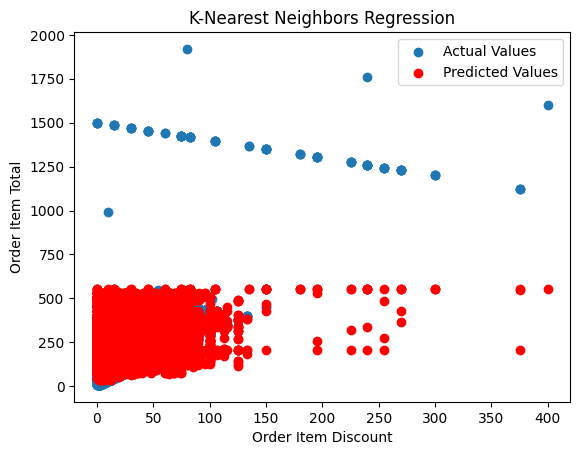

In [ ]:
# Assuming your dataset has columns 'X' and 'y'
X10 = new_data['Order Item Discount'].values.reshape(-1, 1)
y10 = new_data['Order Item Total'].values

# Split the data into training and testing sets
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.2, random_state=42)

# Create a KNN regression model
knn_model10 = KNeighborsRegressor(n_neighbors=1000)  # You can adjust the number of neighbors (k)

# Train the model
knn_model10.fit(X_train10, y_train10)

# Make predictions on the test set
y_pred10 = knn_model10.predict(X_test9)

# Evaluate the model
mse10 = mean_squared_error(y_test10, y_pred10)
r210 = r2_score(y_test10, y_pred10)

print(f'Mean Squared Error on Test Set: {mse10}')
print(f'R-squared on Test Set: {r210}')

# Visualize the results
plt.scatter(X_test10, y_test10, label='Actual Values')
plt.scatter(X_test10, y_pred10, label='Predicted Values', color='red')
plt.xlabel('Order Item Discount')
plt.ylabel('Order Item Total')
plt.title('K-Nearest Neighbors Regression')
plt.legend()
plt.show()


not suitable

**Ridge Regression**

1)order Item tot vs OID:-


Mean Squared Error on Test Set: 10621.711165800423
R-squared on Test Set: 0.2401057824509154


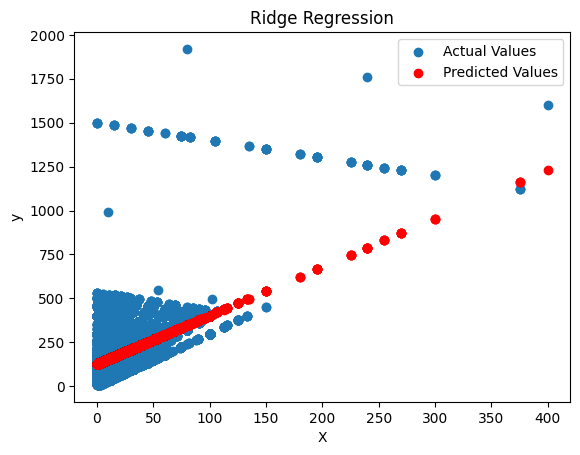

In [11]:
from sklearn.linear_model import Ridge

# Assuming your dataset has columns 'X' and 'y'
X11 = new_data['Order Item Discount'].values.reshape(-1, 1)
y11 = new_data['Order Item Total'].values

# Split the data into training and testing sets
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.2, random_state=42)

# Scaling data
scaler11 = StandardScaler()
X_train_scaled11 = scaler11.fit_transform(X_train11)
X_test_scaled11 = scaler11.transform(X_test11)

# Create a Ridge Regression model
ridge_model11 = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)

# Train the model
ridge_model11.fit(X_train_scaled11, y_train11)

# Make predictions on the test set
y_pred11 = ridge_model11.predict(X_test_scaled11)

# Evaluate the model
mse11 = mean_squared_error(y_test11, y_pred11)
r211 = r2_score(y_test11, y_pred11)

print(f'Mean Squared Error on Test Set: {mse11}')
print(f'R-squared on Test Set: {r211}')

# Visualize the results
plt.scatter(X_test11, y_test11, label='Actual Values')
plt.scatter(X_test11, y_pred11, label='Predicted Values', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression')
plt.legend()
plt.show()


**Summary**
best model for;

1.OIT vs BPO is KNN reg.
2. OIT vs OIB is decision tree reg.
